# Hypothetical Campaign Scenario: Launch of "Classic Men's Jeans"
A clothing retailer is preparing to launch a new product line: "Classic Men's Jeans." The company aims to penetrate the mid-range market segment and attract a younger demographic (ages 18-24). They have allocated a budget of $5,000 for a multi-channel marketing campaign over a three-month period.

Objectives is to:
1.  Maximize Conversion Rates
2.	Optimize ROI
3.	Expand Customer Base


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns   

import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('marketing_campaign_dataset_cleaned.csv')

In [51]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Customer_Segment,Date,campaign_month,campaign_quarter,campaign_channel_interaction,total_customers_converted,total_amount_spent,net_profit,CPC,CTR
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.101,3208.83,9.20,Chicago,...,Health & Wellness,2021-01-01,1,1,Email_Google Ads,19.291,6.190154e+04,5.694942e+05,324.09183,0.925926
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.213,5126.26,10.79,New York,...,Fashionistas,2021-01-02,1,1,Email_Google Ads,354.858,1.819094e+06,1.962803e+07,1091.89338,5.392633
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.028,31422.13,13.86,Los Angeles,...,Outdoor Adventurers,2021-01-03,1,1,Influencer_YouTube,35.868,1.127049e+06,1.562090e+07,879.81964,41.442899
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.021,29309.30,1.04,Miami,...,Health & Wellness,2021-01-04,1,1,Display_YouTube,12.180,3.569873e+05,3.712668e+05,615.49530,2.164341
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.025,27895.45,13.33,Los Angeles,...,Health & Wellness,2021-01-05,1,1,Email_YouTube,12.500,3.486931e+05,4.648079e+06,697.38625,2.540263


## Exploratory Analysis

### 1. How do impressions and CTRs vary across different channels and campaign types, and what can this tell us about potential engagement levels for the 'Classic Men's Jeans' campaign?

First finding the channels which have high impressions for Men in age 18 to 24

In [52]:
filtered_data = df[(df['Target_Audience'] == 'Men 18-24')]

# Calculate total impressions for each channel
impressions_channel = filtered_data.groupby('Channel_Used')['Impressions'].sum().reset_index()

# Sort the results to find channels with highest impressions
impressions_channel = impressions_channel.sort_values(by='Impressions', ascending=False)

# Display the results
#print("Total Impressions by Channel for Men 18-24:")
#print(impressions_channel)

For the top performing channels, we will identify which campaign types within these channels yield the highest engagement levels (CTR).

In [53]:
top_channels = ['Instagram', 'Facebook', 'Google Ads']
filtered_top_channels = filtered_data[filtered_data['Channel_Used'].isin(top_channels)]

# Calculate the average CTR for each Campaign Type within these top channels
ctr_by_campaign = filtered_top_channels.groupby(['Channel_Used', 'Campaign_Type']).agg({'CTR': 'mean'}).reset_index()

# Sort the results to see the highest CTRs for each channel
ctr_by_campaign = ctr_by_campaign.sort_values(by=['Channel_Used', 'CTR'], ascending=[True, False])

# Display the CTR analysis
#print("CTR Analysis for Instagram, Facebook, and Google Ads:")
#print(ctr_by_campaign)

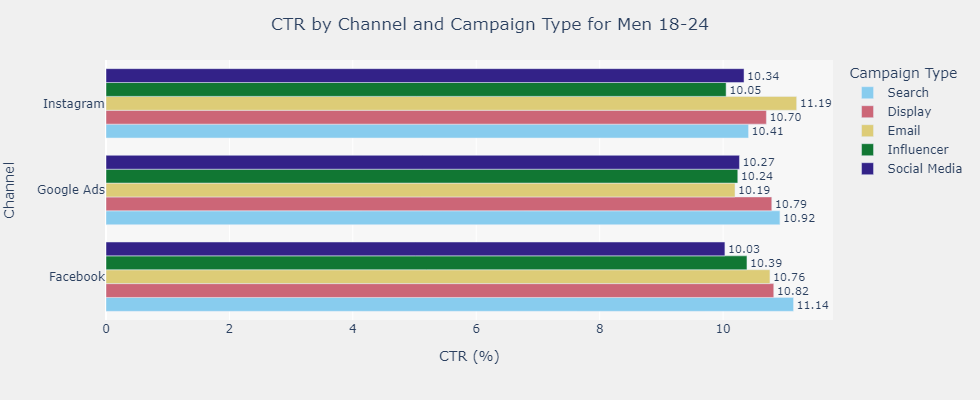

In [54]:
import plotly.express as px
import kaleido

ctr_df_sorted = ctr_by_campaign.sort_values(by=['Channel_Used', 'CTR'], ascending=[True, False])
colors = px.colors.qualitative.Safe  

# Create a bar plot using Plotly Express for simplicity and better control
fig = px.bar(
    ctr_df_sorted, 
    x='CTR', 
    y='Channel_Used', 
    color='Campaign_Type', 
    orientation='h', 
    barmode='group',
    
    text=ctr_df_sorted['CTR'].round(2),  # Display CTR with 2 decimal points
    color_discrete_sequence=colors  # Use the professional color scheme
)

# Customize the layout for a professional look
fig.update_layout(
    title='CTR by Channel and Campaign Type for Men 18-24',
    xaxis_title='CTR (%)',
    yaxis_title='Channel',
    plot_bgcolor='rgba(255, 255, 255, 0.5)',  # Off-white background for plot
    paper_bgcolor='rgba(240, 240, 240, 1)',
    legend_title="Campaign Type",
    title_x=0.5,  # Center the title
    bargap=0.2,  # Gap between bar groups
    barmode='group',
    width=980,       
    height=400
    
)

# Format the text on bars (CTR values) to be 2 decimal places
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

from IPython.display import Image
# Show the figure
#fig.show()
fig.write_image("figure1.png")

# Display the image in the notebook
Image("figure1.png")

#### For the 'Classic Men's Jeans' campaign targeting men aged 18-24:

- **Instagram Email campaigns** show the highest engagement, with a **CTR of 11.19%**, making them the most effective.
- **Facebook Search campaigns** closely follow with a **CTR of 11.14%**, indicating that users searching for products are more likely to engage.
- **Google Ads Search campaigns** also perform well with a **CTR of 10.92%**, suggesting it’s worth considering for driving traffic.

These findings suggest prioritizing **Email on Instagram** and **Search campaigns on Facebook and Google Ads** to maximize engagement and effectively allocate budget.


### 2. How does ROI vary across high-performing channels and campaign types, and what insights can be drawn regarding the effectiveness of these marketing strategies?

In [55]:
# Filter the dataset for high-performing channels and campaign types
high_performing_campaigns = ['Instagram', 'Facebook', 'Google Ads']
high_performing_types = ['Email', 'Search','Display']

filtered_data = df[
    (df['Channel_Used'].isin(high_performing_campaigns)) & 
    (df['Campaign_Type'].isin(high_performing_types))
]

# Calculate ROI for the filtered data
roi_analysis = filtered_data[['Channel_Used', 'Campaign_Type', 'ROI']]

# Group by Channel and Campaign Type, and calculate the mean ROI
roi_summary = roi_analysis.groupby(['Channel_Used', 'Campaign_Type']).mean().reset_index()

# Display the summary
#roi_summary


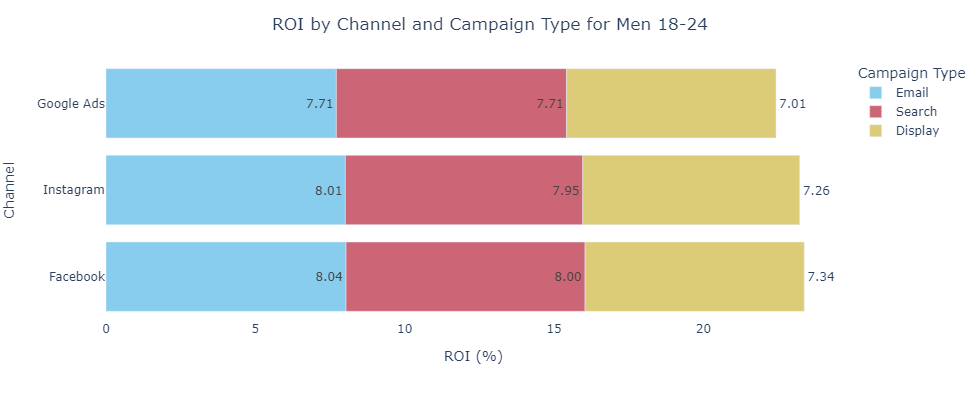

In [56]:
# Sort the data for better visualization
roi_summary_sorted = roi_summary.sort_values(by='ROI', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(
    roi_summary_sorted,
    x='ROI',
    y='Channel_Used',
    color='Campaign_Type',
    orientation='h',
    text=roi_summary_sorted['ROI'].round(2),  # Display ROI with 2 decimal points
    color_discrete_sequence=px.colors.qualitative.Safe  # Use the professional color scheme
)

# Customize the layout for a professional look
fig.update_layout(
    title='ROI by Channel and Campaign Type for Men 18-24',
    xaxis_title='ROI (%)',
    yaxis_title='Channel',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for a cleaner look
    legend_title="Campaign Type",
    title_x=0.5,  # Center the title
    bargap=0.2,  # Gap between bar groups
    width=980,       
    height=400
)

# Format the text on bars (ROI values) to be 2 decimal places
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Show the figure
#fig.show()
fig.write_image("figure2.png")

Image("figure2.png")

#### For the 'Classic Men's Jeans' campaign targeting men aged 18-24:

- **Facebook Email campaigns** lead with an **ROI of 8.04**, indicating a strong return on investment, making it a priority for budget allocation.
- **Instagram Email campaigns** follow closely with an **ROI of 8.01**, suggesting that engaging users through this channel is also highly effective.
- **Facebook Search campaigns** yield an **ROI of 8.00**, reinforcing the importance of search-driven strategies.

These insights emphasize the effectiveness of **email campaigns on both Facebook and Instagram**, suggesting that investing in these channels could maximize returns. 


### 3. How do acquisition costs vary across the high-performing channels and campaign types, and what is their relationship with ROI

In [57]:
demographic_filter = df['Target_Audience'] == 'Men 18-24'

# Define high-performing channels and campaign types
high_performing_channels_campaigns = [
    ('Facebook', 'Email'),
    ('Instagram', 'Email'),
    ('Facebook', 'Search'),
    ('Google Ads', 'Search')
]

# Filter the DataFrame for demographic and high-performing channels/campaign types
high_performing_df = df[demographic_filter & df[['Channel_Used', 'Campaign_Type']].apply(tuple, axis=1).isin(high_performing_channels_campaigns)]

# Calculate average Acquisition Cost and ROI
acquisition_roi_summary = high_performing_df.groupby(['Channel_Used', 'Campaign_Type']).agg(
    Average_Acquisition_Cost=('Acquisition_Cost', 'mean'),
    Average_ROI=('ROI', 'mean')
).reset_index()

# Display the summary
#print(acquisition_roi_summary)

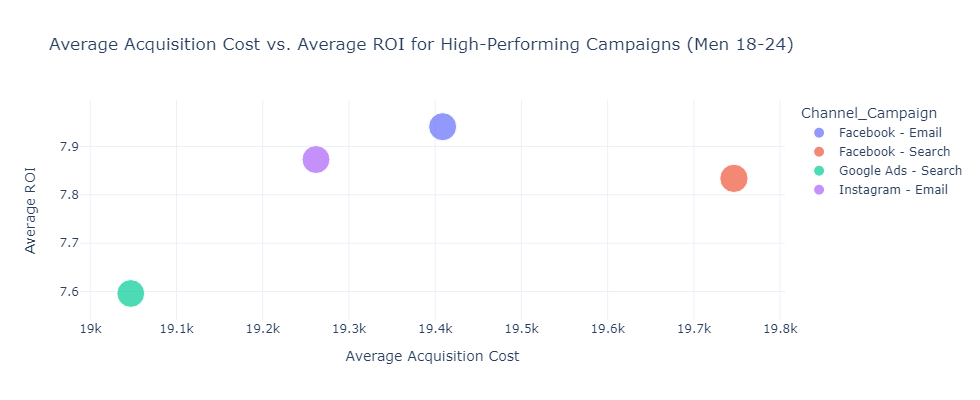

In [58]:
# Create a combined label for Channel and Campaign Type
acquisition_roi_summary['Channel_Campaign'] = acquisition_roi_summary['Channel_Used'] + ' - ' + acquisition_roi_summary['Campaign_Type']

# Create the scatter plot using the combined label
fig = px.scatter(
    acquisition_roi_summary,
    x='Average_Acquisition_Cost',
    y='Average_ROI',
    color='Channel_Campaign',  # Use the combined label for color
    size='Average_Acquisition_Cost',
    hover_name='Channel_Campaign',
    title='Average Acquisition Cost vs. Average ROI for High-Performing Campaigns (Men 18-24)',
    labels={'Average_Acquisition_Cost': 'Average Acquisition Cost', 'Average_ROI': 'Average ROI'},
    template='plotly_white',
    width=980,       
    height=400
)

# Show the figure
#fig.show()
fig.write_image("figure3.png")

# Display the image in the notebook
Image("figure3.png")


### 4. How do conversion rates vary across different channels and campaign types, and what does this indicate about their effectiveness in driving sales?

In [59]:
high_performing_channels = ['Facebook', 'Instagram', 'Google Ads']
high_performing_campaign_types = ['Email', 'Search', 'Display']

# Filter the original dataset for men aged 18-24 and the high-performing campaigns
filtered_data = df[
    (df['Channel_Used'].isin(high_performing_channels)) &
    (df['Campaign_Type'].isin(high_performing_campaign_types)) &
    (df['Target_Audience'] == 'Men 18-24')
]

# Group by Channel and Campaign Type to find average Conversion Rate
conversion_rate_analysis = filtered_data.groupby(['Channel_Used', 'Campaign_Type']).agg(
    Average_Conversion_Rate=('Conversion_Rate', 'mean')
).reset_index()

# Display the results
conversion_rate_analysis


,Channel_Used,Campaign_Type,Average_Conversion_Rate
0,Facebook,Display,0.132826
1,Facebook,Email,0.142604
2,Facebook,Search,0.144542
3,Google Ads,Display,0.124642
4,Google Ads,Email,0.140796
5,Google Ads,Search,0.137135
6,Instagram,Display,0.128512
7,Instagram,Email,0.139805
8,Instagram,Search,0.144182


#### For the 'Classic Men's Jeans' campaign targeting men aged 18-24:

- **Facebook Search campaigns** show the highest average conversion rate at **14.45%**, indicating that this channel is particularly effective in driving conversions.
- **Facebook Email campaigns** closely follow with an average conversion rate of **14.26%**, suggesting a strong performance in engaging users through email.
- **Instagram Search campaigns** also perform well, with an average conversion rate of **14.42%**, highlighting the effectiveness of search strategies on this platform.
- Among Google Ads, **Email campaigns** have an average conversion rate of **14.08%**, making it a valuable channel for driving conversions.

These findings **reiterate** the strength of **search and email campaigns**, particularly on **Facebook and Instagram**, for engaging the target audience of men aged 18-24. 


## Summary Of Exploratory Analysis

We have identified the following high-performing campaign and channel combinations for the 'Classic Men's Jeans' campaign targeting men aged 18-24 based on our analysis of CTR, ROI, Acquisition Cost and conversion rates:

1. **Facebook Email Campaigns**
2. **Instagram Email Campaigns**
3. **Facebook Search Campaigns**
4. **Google Ads Search Campaigns**

These combinations will be prioritized in our future marketing strategies to maximize engagement and ROI.







## Business Questions

### 1. How can we optimize our budget allocation across these high-performing campaigns to maximize ROI?

In [60]:
# Filter the dataset for men aged 18-24 and the specific four high-performing campaigns
filtered_df = df[
    (df['Target_Audience'] == 'Men 18-24') &
    (
        (df['Channel_Used'] == 'Facebook') & (df['Campaign_Type'].isin(['Email', 'Search'])) |
        (df['Channel_Used'] == 'Instagram') & (df['Campaign_Type'] == 'Email') |
        (df['Channel_Used'] == 'Google Ads') & (df['Campaign_Type'] == 'Search')
    )
]

# Aggregate relevant metrics
aggregated_metrics_df = filtered_df.groupby(['Channel_Used', 'Campaign_Type']).agg(
    total_amount_spent=('total_amount_spent', 'sum'),
    average_ROI=('ROI', 'mean'),
    average_Conversion_Rate=('Conversion_Rate', 'mean'),
    total_customers_converted=('total_customers_converted', 'sum'),
    average_acquisition_cost=('Acquisition_Cost', 'mean')
).reset_index()

# Display the aggregated metrics
#aggregated_metrics_df

In [61]:
# Total budget available
total_budget = 5000

# Calculate the proportion of ROI for each campaign
aggregated_metrics_df['ROI_Proportion'] = aggregated_metrics_df['average_ROI'] / aggregated_metrics_df['average_ROI'].sum()

# Allocate the budget based on the ROI proportion
aggregated_metrics_df['Budget_Allocation'] = aggregated_metrics_df['ROI_Proportion'] * total_budget

# Print the results
allocation_result = aggregated_metrics_df[['Channel_Used', 'Campaign_Type', 'Budget_Allocation','average_acquisition_cost','average_ROI']]
#allocation_result

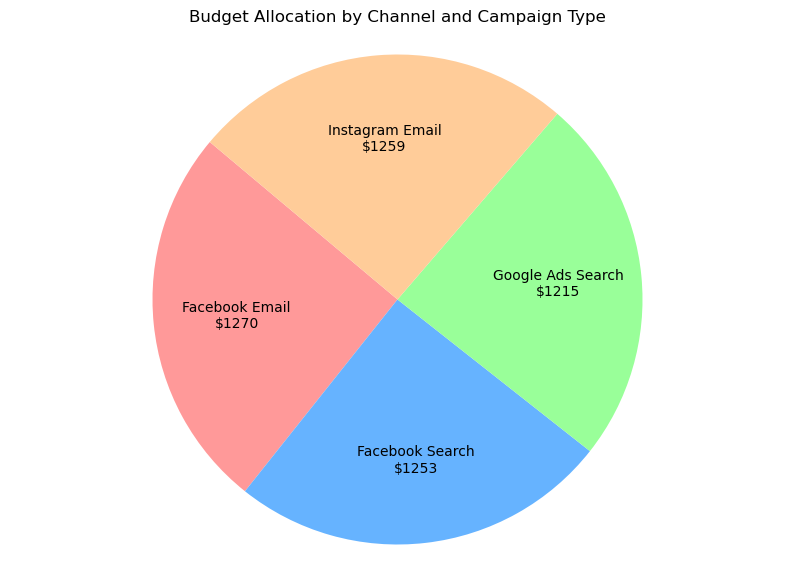

In [62]:
# Prepare data for pie chart
allocation_result['Label'] = allocation_result['Channel_Used'] + ' ' + allocation_result['Campaign_Type'] + '\n$' + allocation_result['Budget_Allocation'].astype(int).astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

wedges, texts, autotexts = ax.pie(allocation_result['Budget_Allocation'], 
                                  labels=allocation_result['Label'],
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Center the labels inside the pie slices
for text in texts:
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')
    text.set_position((0.6 * text.get_position()[0], 0.6 * text.get_position()[1]))

# Remove the percentage labels
for autotext in autotexts:
    autotext.set_visible(False)

plt.title('Budget Allocation by Channel and Campaign Type')
plt.axis('equal')

plt.show()

#### Key Insights:
We analyzed the budget allocation across different marketing channels and campaign types to assess resource distribution. The pie chart illustrates the proportion of spending across these combinations, providing a clear view of which channels and campaigns received the highest investment.

### 2. For each campaign, which customer segment should we target to maximize engagement and conversion

In [63]:
# Group by Channel, Campaign, and Customer Segment to get average Conversion Rate
conversion_rates_summary = (
    filtered_df.groupby(['Channel_Used', 'Campaign_Type', 'Customer_Segment'])
    .agg({'Conversion_Rate': 'mean'})  # Calculate the average Conversion Rate
    .reset_index()
)

# Rename the resulting DataFrame for clarity
conversion_rates_summary.rename(columns={'Conversion_Rate': 'Average_Conversion_Rate'}, inplace=True)

# Display the results
#print(conversion_rates_summary)

In [64]:
# Sort by Average Conversion Rate in descending order
conversion_rates_summary.sort_values(by='Average_Conversion_Rate', ascending=False, inplace=True)

# For each Channel and Campaign, select the customer segment with the highest conversion rate
top_segments_per_campaign = conversion_rates_summary.groupby(['Channel_Used', 'Campaign_Type']).first().reset_index()

# Display the top segments per campaign
#print(top_segments_per_campaign)


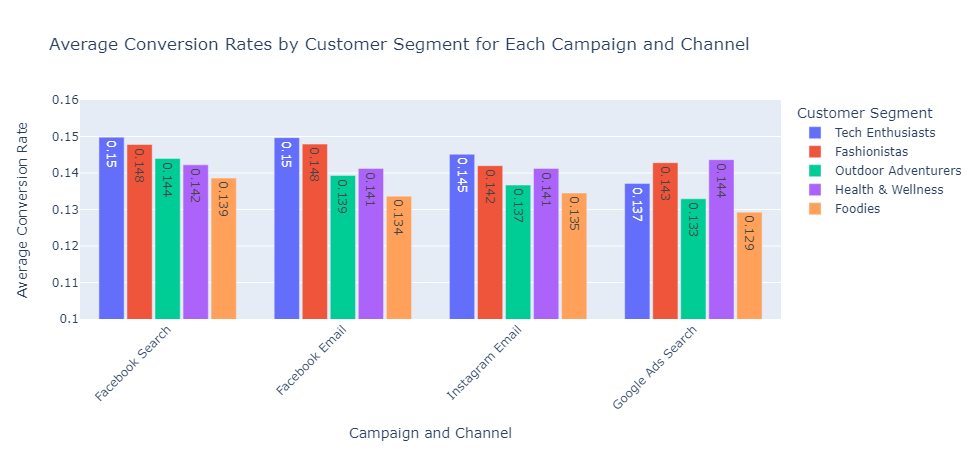

In [65]:
import plotly.graph_objects as go

# Combine 'Channel_Used' and 'Campaign_Type' to create a new column for the x-axis
conversion_rates_summary['Campaign_Channel'] = conversion_rates_summary['Channel_Used'] + ' ' + conversion_rates_summary['Campaign_Type']

# Create the plot
fig = go.Figure()

# Add bars for each customer segment
customer_segments = conversion_rates_summary['Customer_Segment'].unique()

for segment in customer_segments:
    segment_df = conversion_rates_summary[conversion_rates_summary['Customer_Segment'] == segment]
    fig.add_trace(go.Bar(
        x=segment_df['Campaign_Channel'],
        y=segment_df['Average_Conversion_Rate'],
        name=segment,
        text=segment_df['Average_Conversion_Rate'].round(3),
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>Customer Segment: %{name}<br>Conversion Rate: %{y:.2f}<extra></extra>'
    ))

# Update layout
fig.update_layout(
    title='Average Conversion Rates by Customer Segment for Each Campaign and Channel',
    xaxis_title='Campaign and Channel',
    yaxis_title='Average Conversion Rate',
    yaxis=dict(range=[0.1, 0.16]),
    barmode='group',
    bargap=0.20,
    bargroupgap=0.1,
    template='plotly',  # Predefined template for better colors
    legend_title='Customer Segment',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    width=980,       
    height=450
)

# Show the plot
#fig.show()
fig.write_image("figure4.png")

# Display the image in the notebook
Image("figure4.png")

#### Key Insights:

- For the **Facebook Email** campaign, targeting **Tech Enthusiasts** and **Fashionistas** would maximize conversions.
  
- For the **Facebook Search** campaign, the best segments are **Tech Enthusiasts** and **Fashionistas**.

- For the **Google Ads Search** campaign, focusing on **Health & Wellness** and **Fashionistas** would yield the highest conversions.

- For the **Instagram Email** campaign, **Tech Enthusiasts** and **Fashionistas** show the highest conversion rates, making them the optimal segments to target.

### 3. What is the optimal campaign duration for our selected marketing channels to maximize conversion rates?

In [66]:
duration_conversion_summary = (
    filtered_df.groupby(['Duration', 'Channel_Used', 'Campaign_Type'])
    .agg({'Conversion_Rate': 'mean'})  # Calculate the average Conversion Rate
    .reset_index()
)

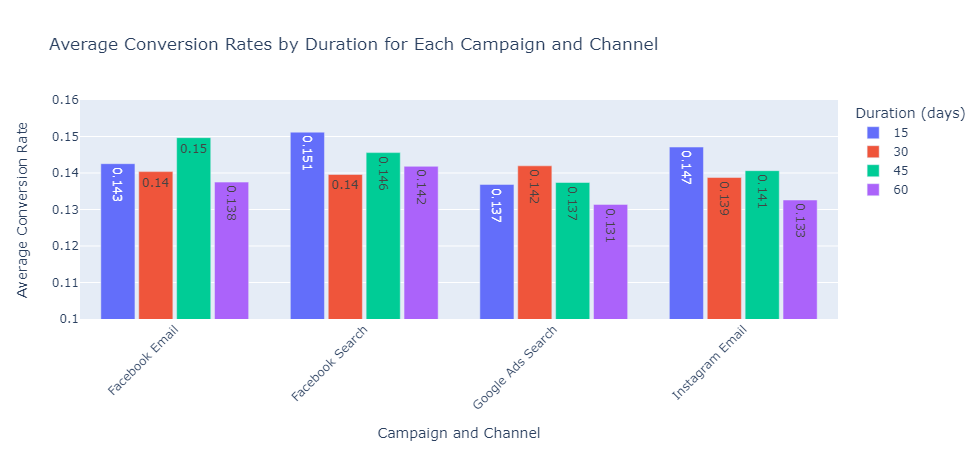

In [67]:
import plotly.graph_objects as go

# Combine 'Channel_Used' and 'Campaign_Type' to create a new column for the x-axis
duration_conversion_summary['Campaign_Channel'] = duration_conversion_summary['Channel_Used'] + ' ' + duration_conversion_summary['Campaign_Type']

# Create the plot
fig = go.Figure()

# Add bars for each unique duration
durations = duration_conversion_summary['Duration'].unique()

for duration in durations:
    segment_df = duration_conversion_summary[duration_conversion_summary['Duration'] == duration]
    fig.add_trace(go.Bar(
        x=segment_df['Campaign_Channel'],
        y=segment_df['Conversion_Rate'],  # Use conversion rate for the y-axis
        name=str(duration),  # Convert duration to string for the legend
        text=segment_df['Conversion_Rate'].round(3),  # Round to 3 decimal places
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>Duration: %{name}<br>Conversion Rate: %{y:.2f}<extra></extra>'  # Update hover text
    ))

# Update layout
fig.update_layout(
    title='Average Conversion Rates by Duration for Each Campaign and Channel',
    xaxis_title='Campaign and Channel',
    yaxis_title='Average Conversion Rate',
    yaxis=dict(range=[0.1, 0.16]),  # Set y-axis range
    barmode='group',  # Group bars by duration
    bargap=0.20,
    bargroupgap=0.1,
    template='plotly',  # Predefined template for better colors
    legend_title='Duration (days)',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    width=980,       
    height=450
)

# Show the plot
#fig.show()
fig.write_image("figure5.png")

# Display the image in the notebook
Image("figure5.png")

#### Key Insights on Ideal Campaign Duration

- **Facebook Email Campaigns**: The ideal duration is **45 days**, achieving the highest conversion rate.

- **Facebook Search Campaigns**: The best duration is **15 days**, yielding a conversion rate.

- **Google Ads Search Campaigns**: The **30-day** duration is optimal with a conversion rate of **0.14**.

- **Instagram Email Campaigns**: A **15-day** duration offers a solid conversion rate of **0.147**.

- **Longer Durations (60 days)**: Both Facebook and Instagram show lower conversion rates compared to shorter durations, particularly in the **Google Ads Search**, which sees a decrease to **0.131**.

Overall, the data indicates that shorter campaign durations (15-30 days) tend to yield higher conversion rates across most channels and campaign types.


### 4. What is the optimal month of the year to run each selected campaign, based on historical conversion rates and considering the ideal campaign duration?

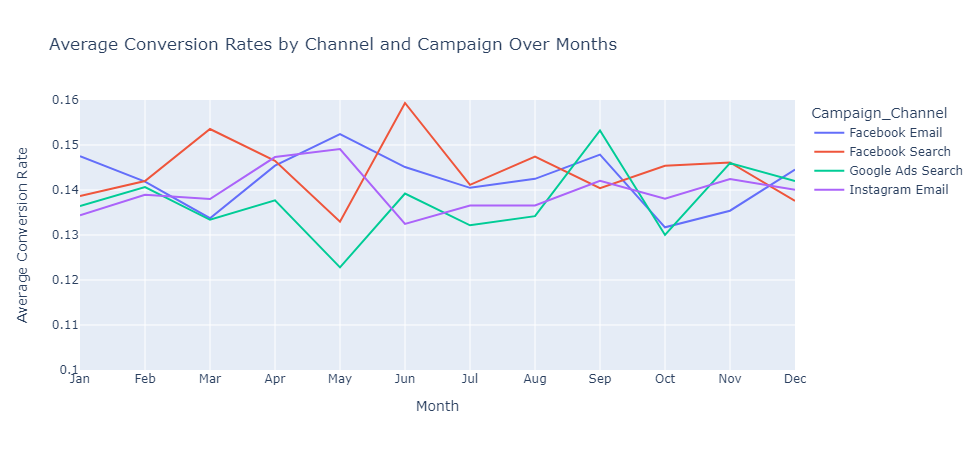

In [68]:
# Combine 'Channel_Used' and 'Campaign_Type' for better grouping
filtered_df['Campaign_Channel'] = filtered_df['Channel_Used'] + ' ' + filtered_df['Campaign_Type']

# Extract month and year from the date
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Month'] = filtered_df['Date'].dt.month
filtered_df['Year'] = filtered_df['Date'].dt.year

# Group by Month and Campaign_Channel to calculate the average Conversion Rate
monthly_conversion_channel_summary = (
    filtered_df.groupby(['Year', 'Month', 'Campaign_Channel'])
    .agg({'Conversion_Rate': 'mean'})  # Calculate the average Conversion Rate
    .reset_index()
)

# Create the line chart
fig = px.line(
    monthly_conversion_channel_summary,
    x='Month',
    y='Conversion_Rate',
    color='Campaign_Channel',
    title='Average Conversion Rates by Channel and Campaign Over Months',
    labels={'Month': 'Month', 'Conversion_Rate': 'Average Conversion Rate'},
)

# Update layout for better visibility
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Conversion Rate',
    yaxis=dict(range=[0.1, 0.16]),  # Set the y-axis range if needed
    xaxis_tickmode='array',  # This allows for better control of x-axis ticks
    xaxis_tickvals=list(range(1, 13)),  # Set tick values for each month
    xaxis_ticktext=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ],# Set month names
    width=980,       
    height=450
)

# Show the plot
#fig.show()
fig.write_image("figure6.png")

# Display the image in the notebook
Image("figure6.png")

#### Ideal Campaign Duration Selection

Based on the analysis of conversion rates, the following optimal durations for running selected campaigns have been identified:

- **Facebook Email**: 
  - **Ideal Duration**: 45 days
  - **Selected Days**: 30 days of May and 15 days of June
  - **Rationale**: These periods exhibited the best consecutive conversion rates.

- **Facebook Search**: 
  - **Ideal Duration**: 15 days
  - **Selected Days**: 15 days in June
  - **Rationale**: This period showed strong performance in conversion rates.

- **Google Ads Search**: 
  - **Ideal Duration**: 30 days
  - **Selected Days**: 30 days of September
  - **Rationale**: This month displayed the highest average conversion rates.

- **Instagram Email**: 
  - **Ideal Duration**: 15 days
  - **Selected Days**: 15 days in May
  - **Rationale**: This period had notable conversion performance.


### 5. How do net profit estimates improve when considering customer segments, durations, and timing?

In [69]:
# Assuming 'allocation_result' DataFrame is already available with necessary columns
allocation_result['Estimated_New_Customers'] = allocation_result['Budget_Allocation'] / allocation_result['average_acquisition_cost']
allocation_result['Estimated_Net_Profit'] = allocation_result['Budget_Allocation'] * (allocation_result['average_ROI'] )

allocation_result['Channel_Campaign'] = allocation_result['Channel_Used'] + " - " + allocation_result['Campaign_Type']

# Format 'Estimated_Net_Profit' and 'Estimated_New_Customers'
allocation_result['Estimated_Net_Profit'] = "$" + allocation_result['Estimated_Net_Profit'].apply(lambda x: f"{int(round(x))}")
allocation_result['Estimated_New_Customers'] = allocation_result['Estimated_New_Customers'].round(2)

# Create a new DataFrame with the required columns
result_df = allocation_result[['Channel_Campaign', 'Estimated_New_Customers', 'Estimated_Net_Profit']]


In [70]:
import pandas as pd

# Your existing code to calculate Estimated Net Profit
result_df = allocation_result.copy()

# Calculate Estimated Net Profit under existing conditions
result_df['Estimated_Net_Profit'] = result_df['Budget_Allocation'] * result_df['average_ROI']

# Prepare to calculate optimal conditions
optimal_net_profits = []

# Define optimal conditions for each campaign
optimal_conditions = {
    "Facebook - Email": {
        "Customer_Segment": ["Tech Enthusiasts", "Fashionistas"],
        "duration": 45
    },
    "Facebook - Search": {
        "Customer_Segment": ["Tech Enthusiasts", "Fashionistas"],
        "duration": 15
    },
    "Google Ads - Search": {
        "Customer_Segment": ["Health & Wellness", "Fashionistas"],
        "duration": 30
    },
    "Instagram - Email": {
        "Customer_Segment": ["Tech Enthusiasts", "Fashionistas"],
        "duration": 15
    }
}

# Loop through each campaign in allocation_result
for index, row in result_df.iterrows():
    channel_campaign = row['Channel_Campaign']
    
    # Get optimal conditions for the current campaign
    conditions = optimal_conditions.get(channel_campaign)
    
    if conditions:
        target_audience = conditions['Customer_Segment']
        duration = conditions['duration']
        
        # Filter the filtered_df for the optimal conditions
        filtered_optimal = filtered_df[
            (filtered_df['Channel_Used'] == row['Channel_Used']) &
            (filtered_df['Campaign_Type'] == row['Campaign_Type']) &
            (filtered_df['Customer_Segment'].isin(target_audience)) &
            (filtered_df['Duration'] == duration)
        ]
        
        # Calculate average ROI for the optimal conditions
        if not filtered_optimal.empty:
            average_optimal_roi = filtered_optimal['ROI'].mean()
        else:
            average_optimal_roi = 0  # Handle cases where no data is found
        
        # Calculate Estimated Net Profit under optimal conditions
        estimated_net_profit_optimal = row['Budget_Allocation'] * average_optimal_roi
    else:
        estimated_net_profit_optimal = 0  # Handle cases where no optimal conditions are defined

    optimal_net_profits.append(estimated_net_profit_optimal)

# Add the new column to the result DataFrame
result_df['Estimated_Net_Profit_Optimal'] = optimal_net_profits

# Format the Estimated Net Profit columns for readability
result_df['Estimated_Net_Profit'] = "$" + result_df['Estimated_Net_Profit'].apply(lambda x: f"{int(round(x))}")
result_df['Estimated_Net_Profit_Optimal'] = "$" + pd.Series(optimal_net_profits).apply(lambda x: f"{int(round(x))}")

# Select relevant columns for the final output
final_result = result_df[['Channel_Campaign', 'Estimated_Net_Profit', 'Estimated_Net_Profit_Optimal']]

# Convert profit columns back to numeric for summation
result_df['Estimated_Net_Profit'] = result_df['Estimated_Net_Profit'].replace({'\$': '', '': '0'}, regex=True).astype(float)
result_df['Estimated_Net_Profit_Optimal'] = result_df['Estimated_Net_Profit_Optimal'].replace({'\$': '', '': '0'}, regex=True).astype(float)

# Calculate total sums
total_existing = result_df['Estimated_Net_Profit'].sum()
total_optimal = result_df['Estimated_Net_Profit_Optimal'].sum()

# Create a total row
total_row = pd.DataFrame({
    'Channel_Campaign': ['Total'],
    'Estimated_Net_Profit': [f"${int(total_existing)}"],
    'Estimated_Net_Profit_Optimal': [f"${int(total_optimal)}"]
})

# Append the total row to the final result
final_result = pd.concat([final_result, total_row], ignore_index=True)



In [71]:
from tabulate import tabulate

print(tabulate(final_result, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════╤════════════════════════╤════════════════════════════════╕
│ Channel_Campaign    │ Estimated_Net_Profit   │ Estimated_Net_Profit_Optimal   │
╞═════════════════════╪════════════════════════╪════════════════════════════════╡
│ Facebook - Email    │ $10091                 │ $10753                         │
├─────────────────────┼────────────────────────┼────────────────────────────────┤
│ Facebook - Search   │ $9821                  │ $10080                         │
├─────────────────────┼────────────────────────┼────────────────────────────────┤
│ Google Ads - Search │ $9234                  │ $9622                          │
├─────────────────────┼────────────────────────┼────────────────────────────────┤
│ Instagram - Email   │ $9919                  │ $10600                         │
├─────────────────────┼────────────────────────┼────────────────────────────────┤
│ Total               │ $39065                 │ $41055                         │
╘═══════════════